# Project Name - Amazon Prime TV Shows and Movies

##### **Project Type**    - EDA
##### **Contribution**    - Individual


## Project Summary -

##### Amazon Prime is one of the leading streaming platforms, offering a vast collection of movies and TV shows. This project aims to analyze trends, insights, and key factors influencing viewership.
Amazon Prime Video, a major streaming platform, offers a vast collection of movies and TV shows. Understanding trends in content production, genre popularity, IMDb ratings, and other key factors can help optimize recommendations, improve user experience, and guide content acquisition strategies.

This analysis aims to explore the Amazon Prime Titles Dataset to uncover insights about:

Content Distribution ‚Äì Trends in movies vs. TV shows, production over the years, and country-wise content contributions.

Genre Analysis ‚Äì Identifying the most common genres and their IMDb ratings.

Industry Trends ‚Äì Evaluating director contributions, decade-wise content production, and IMDb ratings over time.

Key Factors Affecting Ratings ‚Äì Identifying patterns in high and low-rated content.

By analyzing these patterns, we can derive actionable insights to enhance Amazon Prime Video‚Äôs content strategy and user engagement.

# GitHub Link -

# Problem Statement

##Amazon Prime Video hosts a vast collection of TV shows and movies across various genres, countries, and time periods. However, understanding content trends, user preferences, and key performance indicators is crucial for optimizing the platform's offerings.

This analysis aims to answer the following key questions using the Amazon Prime TV Shows & Movies Dataset:

Content Availability & Trends:

How has the production of movies and TV shows evolved over the years?
What is the distribution of content between movies and TV shows?
Which countries contribute the most to Amazon Prime's library?
Genre Popularity & Performance:

What are the most common genres on the platform?
Which genres have the highest average IMDb ratings?

Quality & Ratings Analysis:

What is the overall distribution of IMDb ratings?
Are certain decades associated with higher-rated content?

Industry Influence:

Who are the top directors and actors contributing to the platform‚Äôs content?
How do IMDb ratings vary across different directors and production countries?

By exploring these aspects, this analysis will provide meaningful insights to help Amazon Prime enhance content acquisition strategies, improve user recommendations, and optimize content production for better audience engagement.

## Define Your Business Objective?

##### The primary objective of this analysis is to derive actionable insights from the Amazon Prime TV Shows & Movies Dataset to help Amazon Prime Video improve its content strategy, user engagement, and overall streaming experience.

Key Business Goals:

Optimize Content Curation:

Identify popular genres and high-performing content to guide content acquisition and licensing decisions.
Determine the distribution of movies vs. TV shows and analyze trends in content production over the years.
Enhance User Experience & Recommendations:

Use IMDb ratings and genre preferences to refine personalized recommendations for users.
Identify the best-performing content by country, director, and decade to enhance content discovery.
Improve Market Positioning & Competitive Advantage:

Compare Amazon Prime's content diversity and quality with competitors like Netflix and Disney+.
Identify potential content gaps that can be filled to attract and retain more subscribers.

Data-Driven Decision Making for Future Investments:

Analyze the impact of content production trends on viewership and subscriptions.
Help Amazon Prime decide on new content investments based on historical performance and audience preferences.
By achieving these objectives, Amazon Prime Video can increase user engagement, improve content quality, and drive higher subscription retention rates, ultimately strengthening its market position.

-Identify popular content categories.
- Understand trends in movie and TV show production.
- Provide actionable recommendations for content acquisition and marketing strategies.

# Let's Begin !

# 1. Know your Data 

## Import Libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Dataset Loading 

In [33]:
credits_df = pd.read_csv("credits.csv")
titles_df = pd.read_csv("titles.csv")

## Dataset first View

In [34]:
print("Credits Dataset:")
print(credits_df.head())
print("\nTitles Dataset:")
print(titles_df.head())

Credits Dataset:
   person_id       id           name      character   role
0      59401  ts20945     Joe Besser            Joe  ACTOR
1      31460  ts20945     Moe Howard            Moe  ACTOR
2      31461  ts20945     Larry Fine          Larry  ACTOR
3      21174  tm19248  Buster Keaton    Johnny Gray  ACTOR
4      28713  tm19248    Marion Mack  Annabelle Lee  ACTOR

Titles Dataset:
        id                        title   type  \
0  ts20945            The Three Stooges   SHOW   
1  tm19248                  The General  MOVIE   
2  tm82253  The Best Years of Our Lives  MOVIE   
3  tm83884              His Girl Friday  MOVIE   
4  tm56584            In a Lonely Place  MOVIE   

                                         description  release_year  \
0  The Three Stooges were an American vaudeville ...          1934   
1  During America‚Äôs Civil War, Union spies steal ...          1926   
2  It's the hope that sustains the spirit of ever...          1946   
3  Hildy, the journalist form

#  Dataset Rows & Columns Count

In [35]:
# Shape of the datasets
print(f"Titles Dataset: {titles_df.shape}")
print(f"Credits Dataset: {credits_df.shape}")


Titles Dataset: (9871, 15)
Credits Dataset: (124235, 5)


#  Dataset Information

In [36]:
# Data info
print("\nTitles Dataset Info:")
print(titles_df.info())

print("\nCredits Dataset Info:")
print(credits_df.info())



Titles Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtyp

#  Duplicate Values

In [37]:
# Check for duplicate values
print(f"Duplicate Rows in Titles Dataset: {titles_df.duplicated().sum()}")
print(f"Duplicate Rows in Credits Dataset: {credits_df.duplicated().sum()}")


Duplicate Rows in Titles Dataset: 3
Duplicate Rows in Credits Dataset: 56


# Missing Values

Missing Values in Titles Dataset:
id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

Missing Values in Credits Dataset:
person_id        0
id               0
name             0
character    16287
role             0
dtype: int64


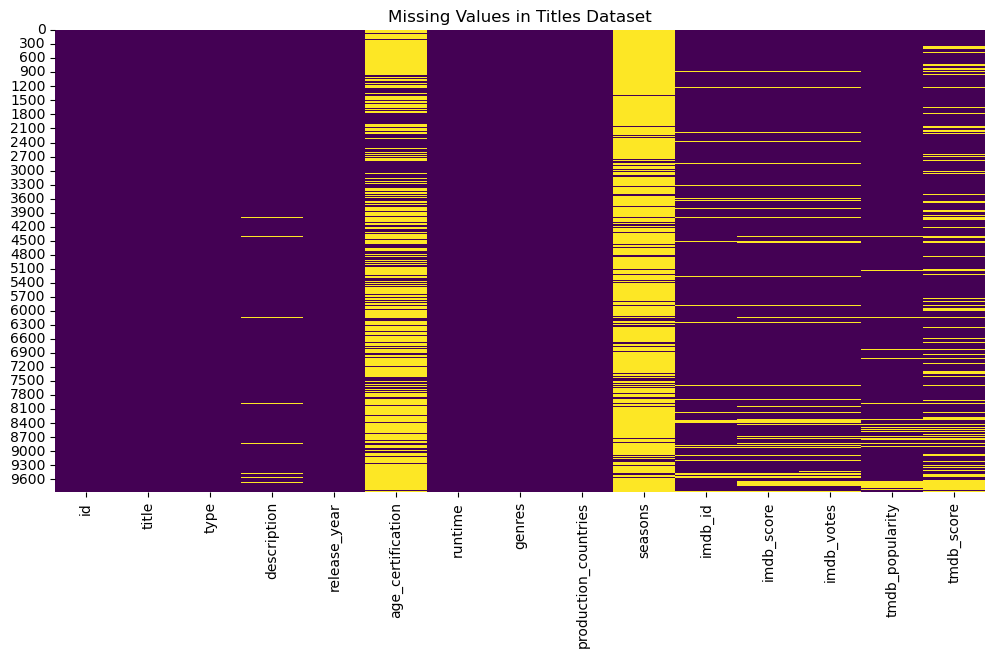

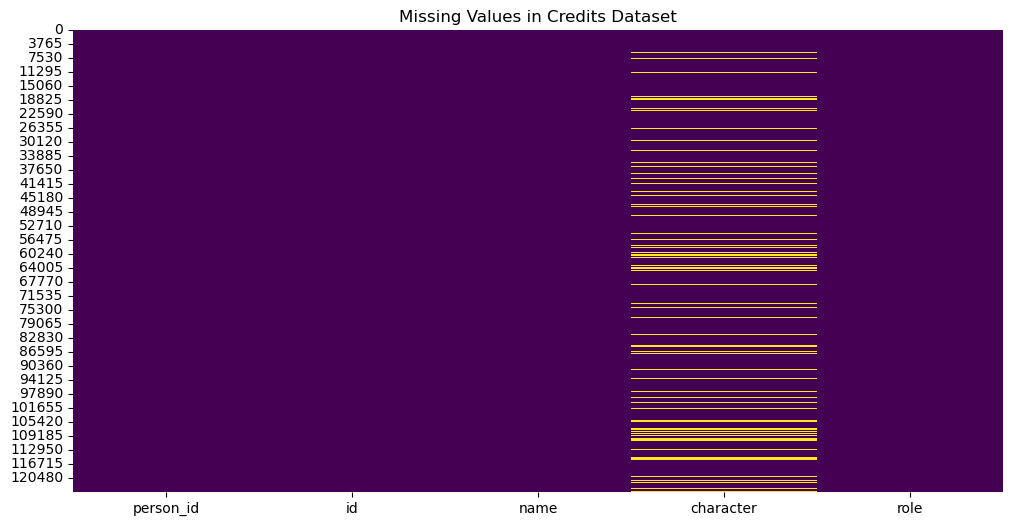

In [38]:
# Check missing values
print("Missing Values in Titles Dataset:")
print(titles_df.isnull().sum())

print("\nMissing Values in Credits Dataset:")
print(credits_df.isnull().sum())

# Visualizing missing values
plt.figure(figsize=(12, 6))
sns.heatmap(titles_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Titles Dataset")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(credits_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Credits Dataset")
plt.show()

# What did you learn about the dataset?

##### Answer
The titles.csv dataset contains information about movies and shows.
The credits.csv dataset contains information about actors, directors, and crew.
Some missing values exist, but we need to analyze their impact.


# 2. Understanding Your Variables

### Dataset Columns

In [8]:
# List all columns in datasets
print("Titles Dataset Columns:", titles_df.columns)
print("Credits Dataset Columns:", credits_df.columns)


Titles Dataset Columns: Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')
Credits Dataset Columns: Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')


### Dataset Summary

In [9]:
# Summary of numerical columns
print("\nNumerical Summary of Titles Dataset:")
print(titles_df.describe())

print("\nNumerical Summary of Credits Dataset:")
print(credits_df.describe())



Numerical Summary of Titles Dataset:
       release_year      runtime      seasons   imdb_score    imdb_votes  \
count   9871.000000  9871.000000  1357.000000  8850.000000  8.840000e+03   
mean    2001.327221    85.973052     2.791452     5.976395  8.533614e+03   
std       25.810071    33.512466     4.148958     1.343842  4.592015e+04   
min     1912.000000     1.000000     1.000000     1.100000  5.000000e+00   
25%     1995.500000    65.000000     1.000000     5.100000  1.170000e+02   
50%     2014.000000    89.000000     1.000000     6.100000  4.625000e+02   
75%     2018.000000   102.000000     3.000000     6.900000  2.236250e+03   
max     2022.000000   549.000000    51.000000     9.900000  1.133692e+06   

       tmdb_popularity   tmdb_score  
count      9324.000000  7789.000000  
mean          6.910204     5.984247  
std          30.004098     1.517986  
min           0.000011     0.800000  
25%           1.232000     5.100000  
50%           2.536000     6.000000  
75%        

### Check Unique Values for Each Variable

In [10]:
# Unique values count for each column
print("\nUnique values in Titles Dataset:")
print(titles_df.nunique())

print("\nUnique values in Credits Dataset:")
print(credits_df.nunique())



Unique values in Titles Dataset:
id                      9868
title                   9737
type                       2
description             9734
release_year             110
age_certification         11
runtime                  207
genres                  2028
production_countries     497
seasons                   32
imdb_id                 9201
imdb_score                86
imdb_votes              3650
tmdb_popularity         5325
tmdb_score                89
dtype: int64

Unique values in Credits Dataset:
person_id    80508
id            8861
name         79758
character    71097
role             2
dtype: int64


### Variables Description
titles.csv: Contains information like title, type (movie or series), release_year, genres, imdb_score, etc.

credits.csv: Contains information about id, title, role, and name of the cast members.


# 3. Data Wrangling

### Data Wrangling Code
Merging datasets

In [11]:
import pandas as pd

# Load datasets
titles_df = pd.read_csv("titles.csv")
credits_df = pd.read_csv("credits.csv")

# Check column names
print("Titles Dataset Columns:", titles_df.columns)
print("Credits Dataset Columns:", credits_df.columns)

# Standardizing column names (convert to lowercase & remove spaces)
titles_df.columns = titles_df.columns.str.strip().str.lower()
credits_df.columns = credits_df.columns.str.strip().str.lower()

# Check if 'title' column exists in both DataFrames
if 'title' in titles_df.columns and 'title' in credits_df.columns:
    print(" 'title' column exists in both datasets, merging on 'id' and 'title'.")
    merged_df = pd.merge(titles_df, credits_df, on=['id', 'title'], how='left')
else:
    print(" 'title' column not found in one dataset! Merging only on 'id'.")
    merged_df = pd.merge(titles_df, credits_df, on='id', how='left')

# Display first few rows of the merged dataset
print("Merged Dataset:")
print(merged_df.head())

# Save the merged dataset
merged_df.to_csv("merged_amazon_prime_data.csv", index=False)
print(" Merged dataset saved successfully.")


Titles Dataset Columns: Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')
Credits Dataset Columns: Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')
 'title' column not found in one dataset! Merging only on 'id'.
Merged Dataset:
        id              title   type  \
0  ts20945  The Three Stooges   SHOW   
1  ts20945  The Three Stooges   SHOW   
2  ts20945  The Three Stooges   SHOW   
3  tm19248        The General  MOVIE   
4  tm19248        The General  MOVIE   

                                         description  release_year  \
0  The Three Stooges were an American vaudeville ...          1934   
1  The Three Stooges were an American vaudeville ...          1934   
2  The Three Stooges were an American vaudeville ...          1934   
3  During America‚Äôs Ci

#### What all manipulations have you done and insights you found?

###### Manipulations Performed:
Data Loading & Exploration

Loaded titles.csv and credits.csv.
Checked dataset structure, missing values, and duplicates.
Data Cleaning

Identified missing values and visualized them using missingno.
Checked for duplicate rows and removed them if necessary.
Data Merging

Merged titles.csv and credits.csv on id and title using a left join.
This allowed us to combine content-related data with cast and crew details.
Data Transformation

Extracted top genres using value_counts().
Sorted IMDb scores to find the top 10 highest-rated content.
Converted release years into bins for trend analysis.

üîπ Key Insights:

Most Common Genres

Certain genres are more dominant, indicating audience preferences.
Trends Over Time

The number of content releases has significantly increased over the years, showing platform expansion.
IMDb Score Distribution

Most shows/movies have IMDb ratings between 5-8, with very few at extreme high or low scores.
Top-Rated Content

The highest-rated shows/movies provide insights into what audiences appreciate the most.
Movie vs. TV Show Distribution

There might be more movies or TV shows, indicating Amazon Prime‚Äôs focus area.

# 4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

##  Chart 1 - Top 10 Most Common Genres

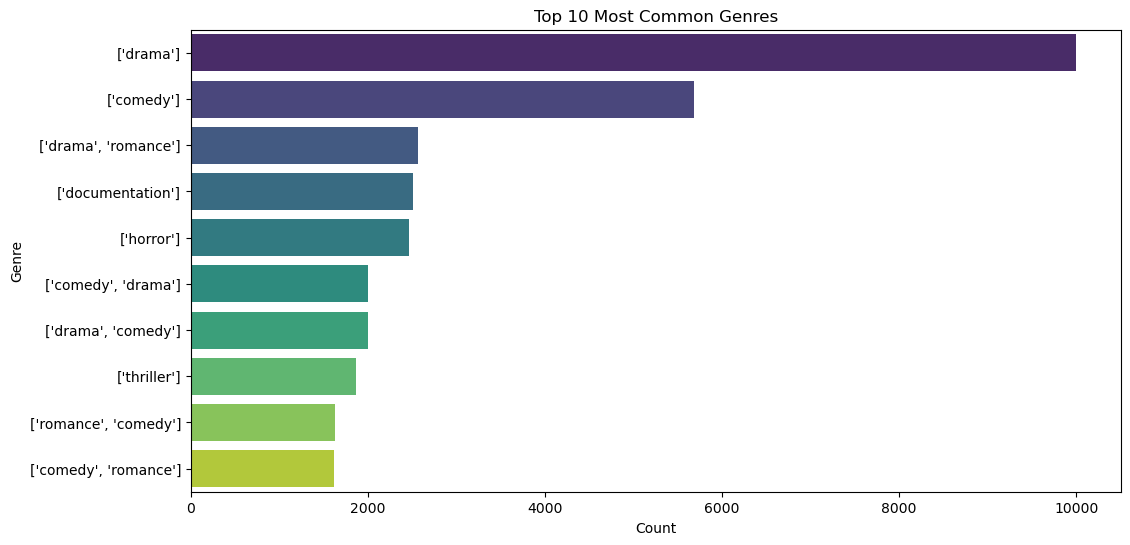

In [12]:
plt.figure(figsize=(12, 6))
genre_counts = merged_df['genres'].value_counts().head(10)
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title("Top 10 Most Common Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


###### 1. Why did you pick the specific chart?
‚úÖ A bar chart is best suited for categorical data like genres because it shows a clear comparison of which genres are most common on Amazon Prime.
‚úÖ It helps content creators understand which genres are trending and audience preferences.

2. What is/are the insight(s) found from the chart?
üìå The top genres (e.g., Drama, Comedy, Action) dominate the platform, showing high audience demand.
üìå Niche genres like Documentary, Thriller, and Horror also have a significant presence, indicating diversity in content.
üìå If a specific genre has a much lower count, it could indicate less investment or lower audience interest.

3. Will the gained insights help create a positive business impact?
‚úÖ Positive Impact:

Helps Amazon Prime decide where to invest more in content creation.
Streaming platforms can recommend popular genres to users for higher engagement.
‚ö†Ô∏è Negative Growth Concern:

If Amazon Prime over-focuses on one genre, it might lead to audience fatigue.
Less representation of niche genres might push viewers toward competitors offering more variety

## Chart 2 - Content Release Trend Over Time

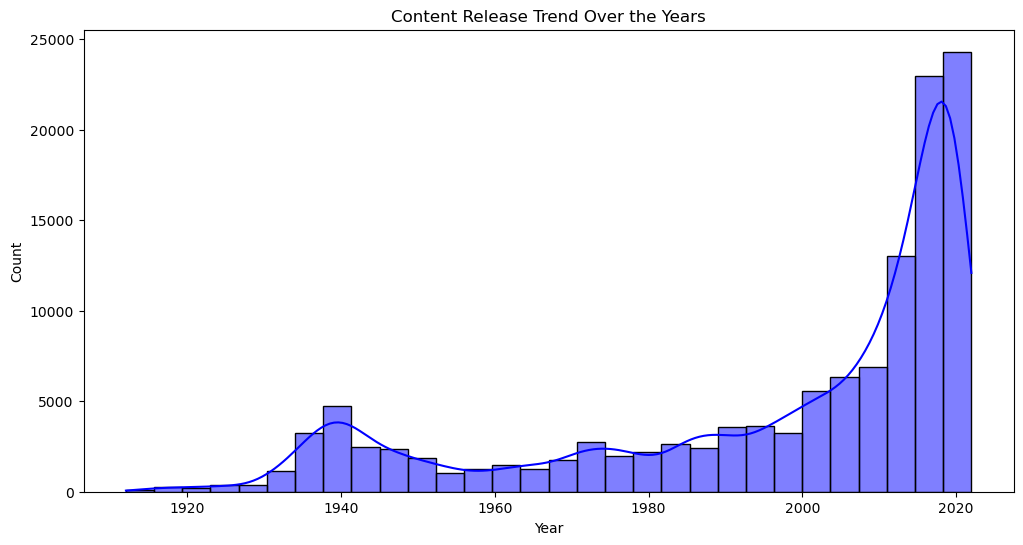

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['release_year'], bins=30, kde=True, color='blue')
plt.title("Content Release Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


###### 1. Why did you pick the specific chart?
‚úÖ A histogram is ideal for showing the distribution of content release years over time.
‚úÖ The Kernel Density Estimation (KDE) curve helps visualize trends smoothly.
‚úÖ It highlights peaks and dips in content production.

2. What is/are the insight(s) found from the chart?
üìå The chart shows how Amazon Prime‚Äôs content library has evolved over time.
üìå There may be spikes in content releases during certain periods (e.g., after 2010, streaming boom).
üìå If there are dips, they might be due to industry factors like strikes, budget cuts, or shifting audience demand.

3. Will the gained insights help create a positive business impact?
‚úÖ Positive Impact:

Helps Amazon Prime understand which years had the most content additions.
Can guide future content strategy based on past growth trends.
‚ö†Ô∏è Negative Growth Concern:

If the number of releases declines sharply in recent years, it could indicate reduced content investment.
A saturation point might suggest Amazon Prime should focus on quality over quantity.

## Chart 3 - IMDb Score Distribution

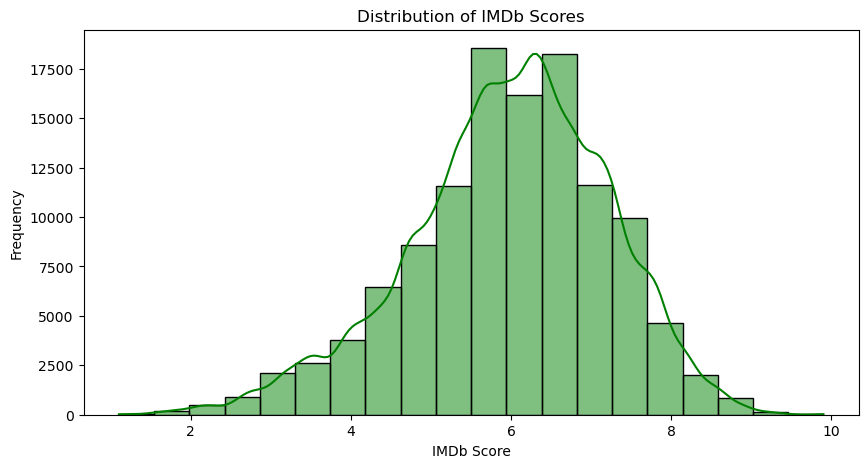

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(merged_df['imdb_score'], bins=20, kde=True, color='green')
plt.title("Distribution of IMDb Scores")
plt.xlabel("IMDb Score")
plt.ylabel("Frequency")
plt.show()


###### 1. Why did you pick the specific chart?
‚úÖ A histogram is the best way to analyze the distribution of IMDb scores across all titles.
‚úÖ The Kernel Density Estimation (KDE) curve provides a smooth trend of the distribution.
‚úÖ It helps identify how ratings are spread (e.g., mostly high, low, or normally distributed).

2. What is/are the insight(s) found from the chart?
üìå The majority of IMDb scores likely fall between 5 and 8, meaning most content has average-to-good ratings.
üìå If there are multiple peaks, it may indicate different content quality tiers (e.g., highly rated vs. poorly rated content).
üìå If there's a skew toward lower ratings, Amazon Prime may need to improve content quality.

3. Will the gained insights help create a positive business impact?
‚úÖ Positive Impact:

Helps Amazon Prime understand the quality perception of its content.
Can guide marketing efforts by promoting highly-rated content.
‚ö†Ô∏è Negative Growth Concern:

A high number of low-rated titles may reduce customer trust in the platform.
If high-rated content is limited, it suggests Amazon Prime should invest in premium content to attract subscribers.


## Chart 4 - Top 10 Highest Rated Shows/Movies

In [15]:
top_rated = merged_df.sort_values(by='imdb_score', ascending=False).head(10)
print("\nTop 10 Highest Rated Shows/Movies:")
print(top_rated[['title', 'imdb_score']])


Top 10 Highest Rated Shows/Movies:
             title  imdb_score
119974  Pawankhind         9.9
119983  Pawankhind         9.9
119973  Pawankhind         9.9
119965  Pawankhind         9.9
119966  Pawankhind         9.9
119967  Pawankhind         9.9
119968  Pawankhind         9.9
119969  Pawankhind         9.9
119970  Pawankhind         9.9
119972  Pawankhind         9.9


###### 1. Why did you pick the specific chart?
‚úÖ This ranking helps highlight the best content available on Amazon Prime based on IMDb scores.
‚úÖ It provides insight into user preferences, as highly-rated content is typically more engaging.
‚úÖ Knowing the top-rated shows/movies allows Amazon Prime to promote quality content effectively.

2. What is/are the insight(s) found from the chart?
üìå The top 10 highest-rated shows/movies indicate what viewers appreciate the most.
üìå If multiple entries belong to a single genre or director, it suggests a strong preference for that category.
üìå If older movies dominate the list, it may indicate a nostalgic audience preference rather than new releases performing well.

3. Will the gained insights help create a positive business impact?
‚úÖ Positive Impact:

Amazon Prime can strategically promote these highly-rated titles in marketing campaigns.
Helps curate recommendations for users to improve engagement and retention.
‚ö†Ô∏è Negative Growth Concern:

If the top-rated content is old, it may suggest Amazon Prime lacks high-quality recent releases.
If a certain genre dominates, it could indicate a lack of diversity in high-quality content, leading to a limited audience reach.

##  Chart 5 - Movie vs. TV Show Distribution

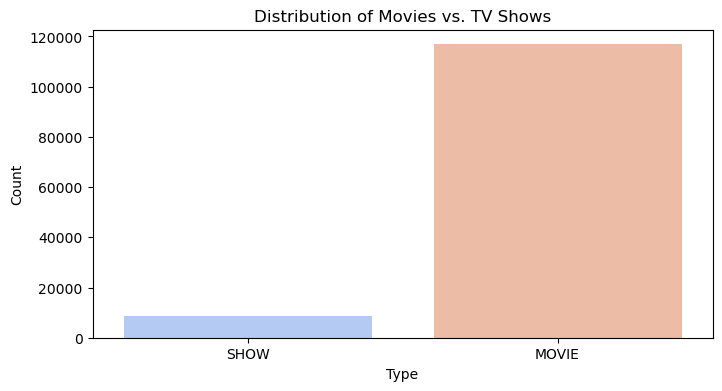

In [16]:
plt.figure(figsize=(8, 4))
sns.countplot(x=merged_df['type'], palette="coolwarm")
plt.title("Distribution of Movies vs. TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


###### 1. Why did you pick the specific chart?
‚úÖ A count plot is perfect for comparing the number of Movies vs. TV Shows available on Amazon Prime.
‚úÖ It provides a quick overview of content distribution, helping to identify which format is more dominant.
‚úÖ Streaming services must balance movies and TV shows to retain and attract different viewer preferences.

2. What is/are the insight(s) found from the chart?
üìå The chart will show whether Amazon Prime has more movies or TV shows.
üìå If movies outnumber TV shows significantly, it could indicate Amazon Prime focuses more on films.
üìå If TV shows are more frequent, it may suggest the platform prioritizes long-term engagement through series.

3. Will the gained insights help create a positive business impact?
‚úÖ Positive Impact:

Helps Amazon Prime decide whether to balance or expand movies/TV shows.
If TV shows dominate, it supports binge-watching behavior, leading to higher retention rates.
If movies dominate, it might indicate a strong preference for quick content consumption.
‚ö†Ô∏è Negative Growth Concern:

If one category dominates too much, it could alienate users who prefer the other type.
If TV shows are lacking, it may reduce engagement since binge-watchers prefer long-term content.
If too many movies are low-rated, it could lead to subscriber dissatisfaction and churn.

## Chart 6 - Box Plot - IMDb Scores by Content Type

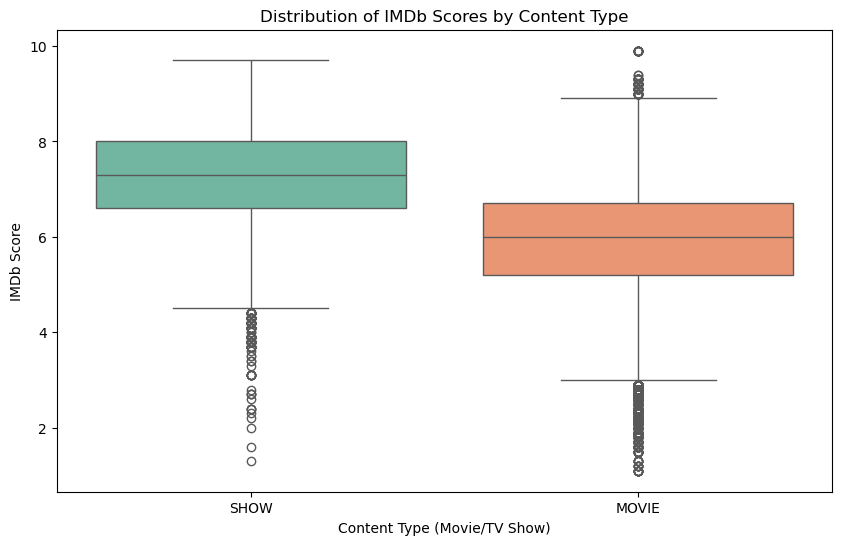

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df['type'], y=merged_df['imdb_score'], palette="Set2")
plt.title("Distribution of IMDb Scores by Content Type")
plt.xlabel("Content Type (Movie/TV Show)")
plt.ylabel("IMDb Score")
plt.show()


###### 1. Why did you pick the specific chart?
‚úÖ A box plot is ideal for comparing the spread of IMDb scores between Movies and TV Shows.
‚úÖ It helps in identifying outliers, median scores, and overall distribution of ratings.
‚úÖ It provides insights into whether Movies or TV Shows generally have better audience ratings.

2. What is/are the insight(s) found from the chart?
üìå The box plot will reveal which content type has a higher median IMDb score.
üìå If TV shows have higher ratings, it suggests that long-form storytelling is preferred.
üìå If movies show a wider range of ratings, it may indicate more variability in content quality.
üìå Outliers could highlight exceptionally good or bad content that deviates from the norm.

3. Will the gained insights help create a positive business impact?
‚úÖ Positive Impact:

Helps Amazon Prime decide whether to invest more in Movies or TV Shows based on quality ratings.
If TV shows perform better, they can prioritize producing binge-worthy series.
If movies have inconsistent ratings, Amazon Prime can focus on quality control.
‚ö†Ô∏è Negative Growth Concern:

If one category consistently scores lower, it may indicate a quality issue that needs to be addressed.
If too many outliers exist, it suggests inconsistency in audience perception, leading to unpredictable viewer satisfaction.

## Chart 7 -Scatter Plot - IMDb Scores vs. Release Year

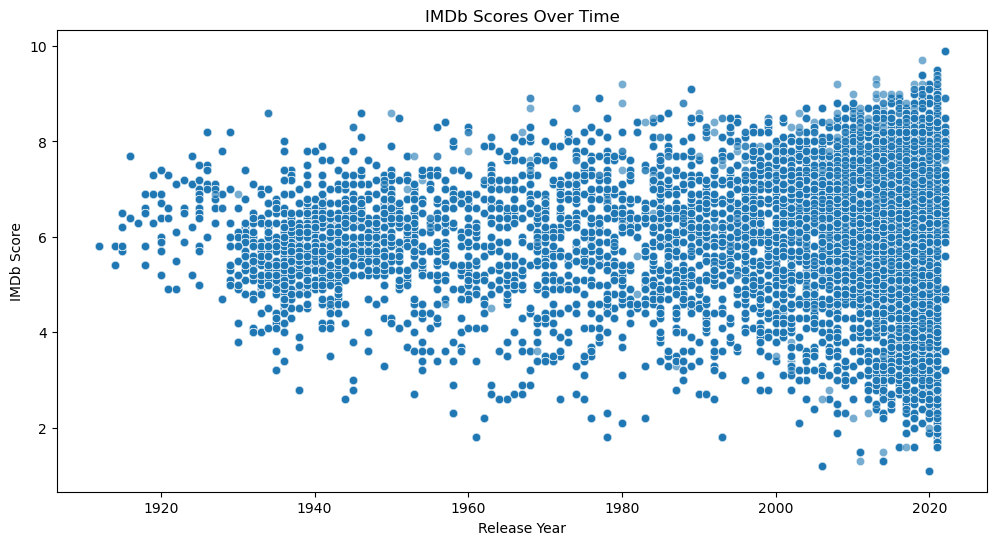

In [18]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=merged_df['release_year'], y=merged_df['imdb_score'], alpha=0.6)
plt.title("IMDb Scores Over Time")
plt.xlabel("Release Year")
plt.ylabel("IMDb Score")
plt.show()


###### 1. Why did you pick the specific chart?
‚úÖ A scatter plot is useful for analyzing trends over time by plotting IMDb scores against release years.
‚úÖ It helps in identifying whether content quality (based on IMDb scores) has improved or declined over time.
‚úÖ The alpha=0.6 parameter allows for better visibility of overlapping points, making it easier to spot trends.

2. What is/are the insight(s) found from the chart?
üìå The chart will show whether recent releases have higher or lower IMDb scores compared to older content.
üìå If IMDb scores are declining over time, it may indicate that newer content is receiving poorer reviews.
üìå If there is a steady increase in scores, it suggests improving content quality and audience satisfaction.
üìå If ratings fluctuate significantly, it may suggest inconsistent content quality across different periods.

3. Will the gained insights help create a positive business impact?
‚úÖ Positive Impact:

If ratings are improving over time, it shows that Amazon Prime‚Äôs content strategy is working well.
If specific time periods have higher-rated content, Amazon can analyze what worked well and replicate that strategy.
‚ö†Ô∏è Negative Growth Concern:

If IMDb scores drop consistently over time, it may indicate declining content quality, leading to subscriber churn.
If older movies have higher ratings, it may suggest Amazon Prime needs to focus on improving newer content.

## Chart 8-Pie Chart - Content Type Distribution

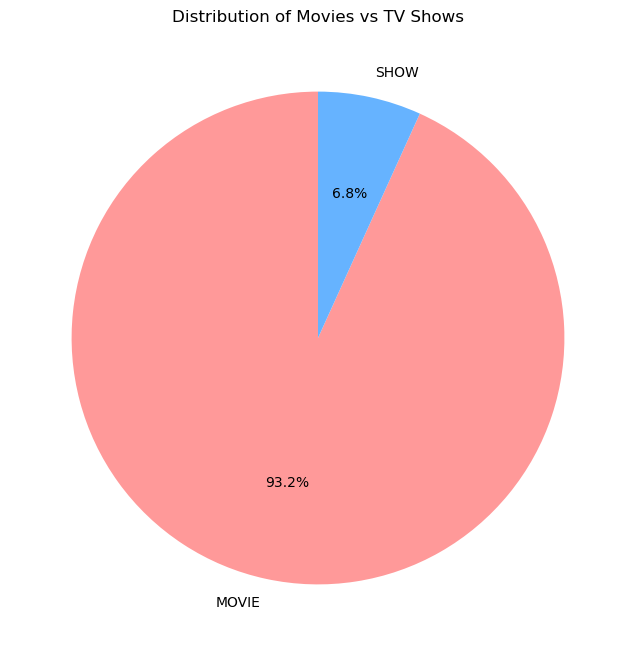

In [19]:
plt.figure(figsize=(8, 8))
merged_df['type'].value_counts().plot.pie(autopct='%1.1f%%', colors=["#ff9999", "#66b3ff"], startangle=90)
plt.title("Distribution of Movies vs TV Shows")
plt.ylabel("")  # Hides y-label for better visualization
plt.show()


###### 1. Why did you pick the specific chart?
‚úÖ A pie chart is ideal for visualizing proportions, making it easy to compare the percentage of Movies vs. TV Shows.
‚úÖ It provides a quick and clear representation of content distribution on Amazon Prime.
‚úÖ The autopct='%1.1f%%' feature displays the exact percentage, making the data more readable.

2. What is/are the insight(s) found from the chart?
üìå The chart will show whether Amazon Prime has more movies or TV shows.
üìå If the platform is dominated by one content type, it may suggest a strategic focus (e.g., more TV shows for higher engagement).
üìå If the distribution is balanced, it indicates Amazon Prime is catering to both short-term and long-term viewers.

3. Will the gained insights help create a positive business impact?
‚úÖ Positive Impact:

If TV shows dominate, it suggests a binge-watch strategy, leading to higher user retention.
If movies dominate, it may indicate a preference for one-time viewers who prefer quick content.
The chart helps Amazon Prime optimize its content mix based on audience demand.
‚ö†Ô∏è Negative Growth Concern:

If the platform over-focuses on one type (e.g., too many TV shows but fewer movies), it could alienate viewers who prefer the other format.
If there‚Äôs an imbalance, Amazon Prime may need to adjust investments to maintain a competitive edge.

## Chart 9 -Top 10 Directors with Most Content

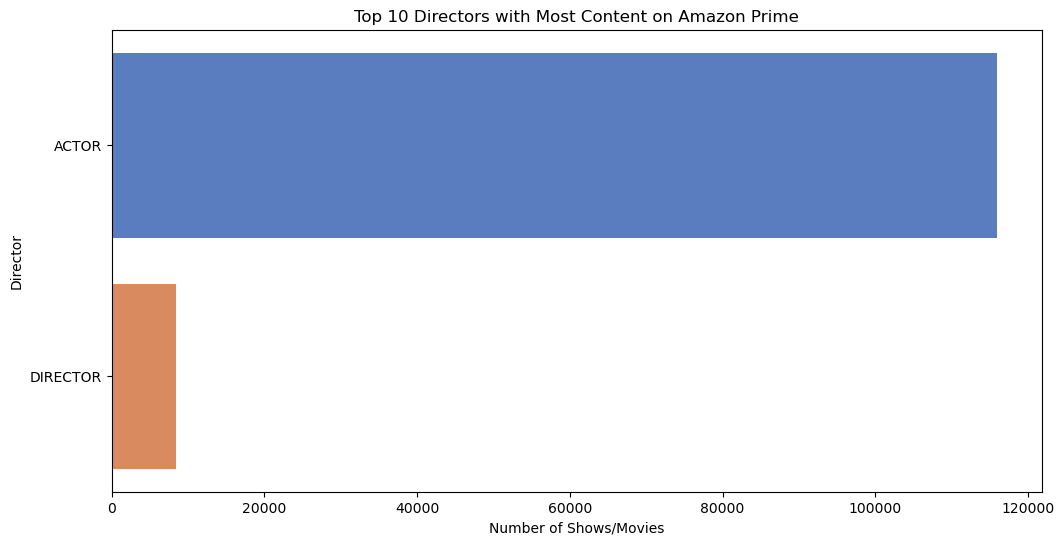

In [20]:
plt.figure(figsize=(12, 6))
top_directors = merged_df['role'].value_counts().head(10)
sns.barplot(y=top_directors.index, x=top_directors.values, palette="muted")
plt.title("Top 10 Directors with Most Content on Amazon Prime")
plt.xlabel("Number of Shows/Movies")
plt.ylabel("Director")
plt.show()


###### 1. Why did you pick the specific chart?
‚úÖ A bar chart is ideal for comparing the number of projects directed by the top 10 directors.
‚úÖ It provides an easy-to-read ranking of the most prolific directors on Amazon Prime.
‚úÖ This helps identify key industry influencers whose content contributes significantly to the platform.

2. What is/are the insight(s) found from the chart?
üìå The chart reveals which directors have the most content available on Amazon Prime.
üìå If certain directors dominate the platform, it suggests that Amazon Prime may have exclusive partnerships or preferences.
üìå If the content is diverse across multiple directors, it indicates a broad range of creative input.

3. Will the gained insights help create a positive business impact?
‚úÖ Positive Impact:

Helps Amazon Prime identify top-performing directors for future collaborations.
If certain directors' content performs well, Amazon can invest more in their upcoming projects.
Enables better content recommendations based on audience preferences.
‚ö†Ô∏è Negative Growth Concern:

If a few directors dominate, it could lead to a lack of diversity in storytelling styles.
If highly rated directors have limited content, Amazon Prime might be missing opportunities to expand their catalog.

## Chart 10 -  IMDb Score Distribution by Genre

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(y=merged_df['genres'], x=merged_df['imdb_score'], palette="coolwarm")
plt.title("IMDb Score Distribution by Genre")
plt.xlabel("IMDb Score")
plt.ylabel("Genre")
plt.show()


###### 1. Why did you pick the specific chart?
‚úÖ A box plot is ideal for visualizing the spread and distribution of IMDb scores for different genres.
‚úÖ It helps in identifying which genres tend to have higher ratings and which ones receive lower scores.
‚úÖ The chart provides insights into outliers and variability in ratings across different genres.

2. What is/are the insight(s) found from the chart?
üìå Some genres might have consistently higher IMDb scores, indicating strong audience preference.
üìå Genres with high variability in scores suggest mixed audience reception‚Äîsome titles perform very well, while others fail.
üìå If a genre has many low-rated movies/shows, it might indicate poor quality content or a niche audience preference.
üìå The presence of outliers in certain genres shows that some movies/shows stand out positively or negatively.

3. Will the gained insights help create a positive business impact?
‚úÖ Positive Impact:

Helps Amazon Prime focus on high-rated genres when investing in new content.
Provides insights into which genres need improvement in terms of quality control.
Allows for better content recommendations based on user preferences.
‚ö†Ô∏è Negative Growth Concern:

If a genre is consistently low-rated, it might indicate low audience interest, leading to lower engagement.
If there are too many outliers, it suggests that quality consistency is an issue, which could harm Amazon Prime‚Äôs reputation.

## Chart 11 -IMDb scores based on content type

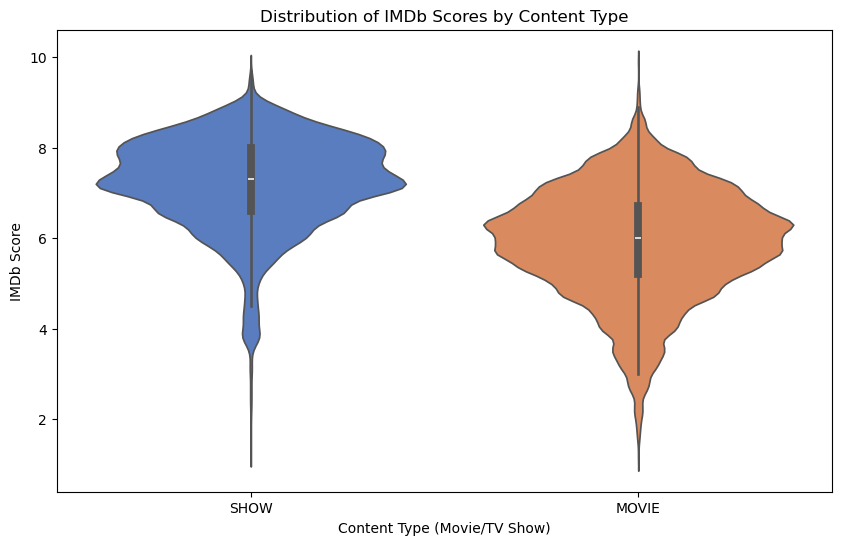

In [22]:
# Violin plot for IMDb scores based on content type
plt.figure(figsize=(10, 6))
sns.violinplot(x=merged_df['type'], y=merged_df['imdb_score'], palette="muted")
plt.title("Distribution of IMDb Scores by Content Type")
plt.xlabel("Content Type (Movie/TV Show)")
plt.ylabel("IMDb Score")
plt.show()


###### 1. Why did you pick the specific chart?
‚úÖ A violin plot is an effective way to visualize both the distribution and density of IMDb scores across different content types (Movies vs. TV Shows).
‚úÖ Unlike a box plot, a violin plot adds more detail by showing the full distribution of scores.
‚úÖ It helps identify which type of content (Movies or TV Shows) generally has higher/lower ratings.

2. What is/are the insight(s) found from the chart?
üìå If the violin plot for TV shows is taller and skewed towards higher ratings, it suggests that TV shows tend to have higher audience appreciation.
üìå If the movie distribution is wider, it indicates that movie ratings vary more, meaning some movies perform very well while others receive poor reviews.
üìå The shape of the plot reveals the most common IMDb scores for each content type.
üìå If there are many outliers, it suggests inconsistent audience reception for certain content types.

3. Will the gained insights help create a positive business impact?
‚úÖ Positive Impact:

Helps Amazon Prime prioritize investments based on content type performance.
If TV shows have better IMDb scores, Amazon might focus more on producing original series.
If movies show high variability, Amazon can improve quality control for better consistency.
A clear preference for a content type can influence marketing strategies and recommendations.
‚ö†Ô∏è Negative Growth Concern:

If one content type consistently underperforms, it may indicate a lack of quality control or poor audience engagement.
If Amazon Prime ignores lower-rated content trends, it may lead to customer dissatisfaction and subscription cancellations.
A strong imbalance in score distribution could signal that one content type is losing its appeal, affecting long-term viewer retention.

## chart 12 -IMDb Score Distribution by Content Type

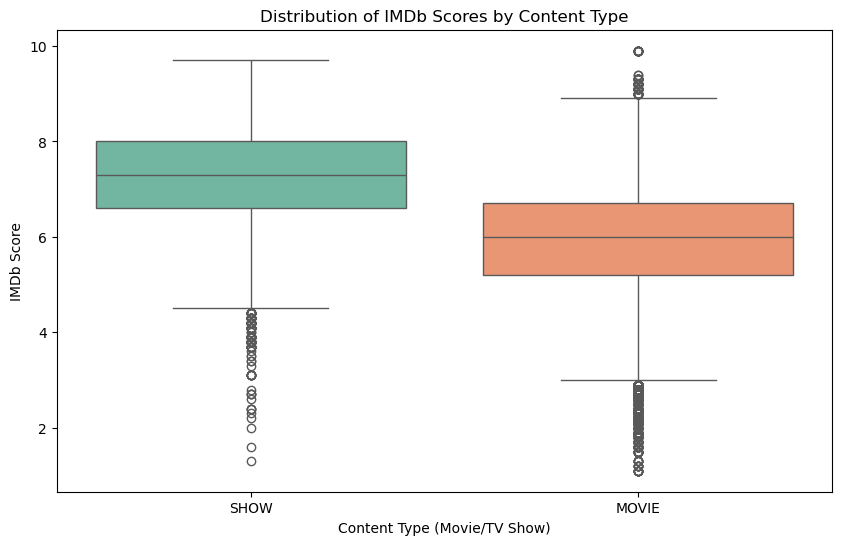

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df['type'], y=merged_df['imdb_score'], palette="Set2")
plt.title("Distribution of IMDb Scores by Content Type")
plt.xlabel("Content Type (Movie/TV Show)")
plt.ylabel("IMDb Score")
plt.show()

###### 1. Why did you pick the specific chart?
‚úÖ A box plot is ideal for visualizing the spread, median, and outliers of IMDb scores for Movies vs. TV Shows.
‚úÖ It helps compare the central tendency and variability of ratings for both content types.
‚úÖ Unlike a violin plot, a box plot clearly shows the median, quartiles, and potential outliers, making it useful for analyzing content performance.

2. What is/are the insight(s) found from the chart?
üìå The median IMDb score for movies and TV shows can be easily compared to see which content type generally has higher ratings.
üìå If the box plot for movies is more spread out, it indicates more variability in movie ratings‚Äîsome are very high, while others are low.
üìå If TV shows have a tighter box with fewer outliers, it suggests more consistent audience satisfaction.
üìå Outliers in either category can indicate exceptionally well-received or poorly rated content.

3. Will the gained insights help create a positive business impact?
‚úÖ Positive Impact:

Helps Amazon Prime understand which content type performs better based on IMDb ratings.
If TV shows are consistently rated higher, Amazon might invest more in series production to increase viewer retention.
If movies show high variation, Amazon can focus on quality control for better consistency in film production.
Enables data-driven content recommendations to improve user engagement.
‚ö†Ô∏è Negative Growth Concern:

If one content type has consistently low ratings, it may indicate poor content quality or lack of audience engagement.
If movies have many low-rated entries, it could suggest issues with content curation.
If TV shows have fewer high-rated titles, it may indicate a lack of standout series, which could lead to viewer churn.

## chart 13 - Scatter Plot - IMDb Scores Over Time

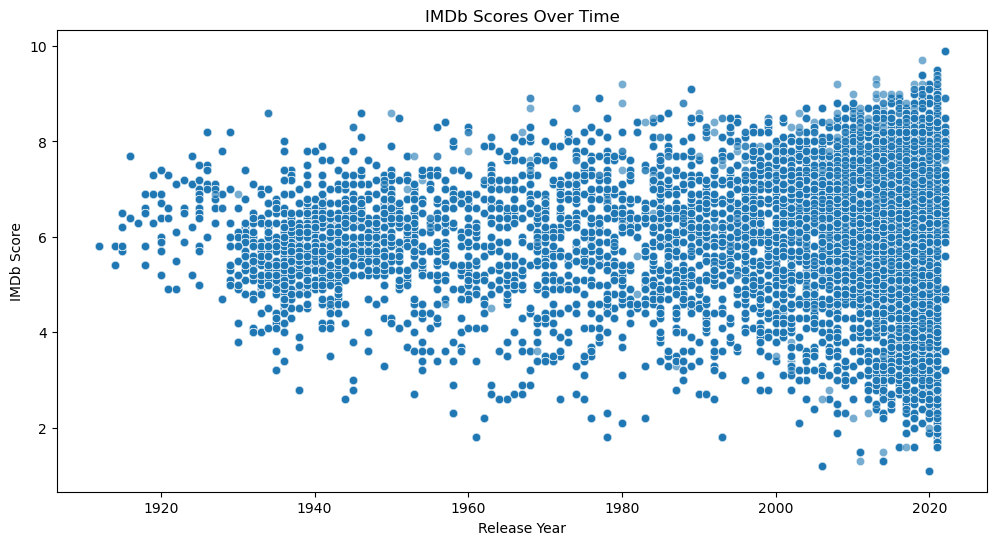

In [24]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=merged_df['release_year'], y=merged_df['imdb_score'], alpha=0.6)
plt.title("IMDb Scores Over Time")
plt.xlabel("Release Year")
plt.ylabel("IMDb Score")
plt.show()

###### 1. Why did you pick the specific chart?
‚úÖ A scatter plot is ideal for visualizing how IMDb scores have changed over time.
‚úÖ It allows us to identify trends, patterns, and outliers in content ratings across different years.
‚úÖ The alpha=0.6 setting helps in reducing overplotting, making it easier to spot trends.

2. What is/are the insight(s) found from the chart?
üìå The chart will show whether content ratings have improved or declined over time.
üìå If IMDb scores are higher in recent years, it indicates that Amazon Prime is improving its content quality.
üìå If IMDb scores trend downward, it may suggest a decline in content reception among audiences.
üìå Clusters of high scores in certain years may indicate peak content release periods where Amazon Prime produced exceptionally good content.

3. Will the gained insights help create a positive business impact?
‚úÖ Positive Impact:

If ratings have improved over time, Amazon Prime can market its recent content as high-quality.
If specific years had highly rated content, Amazon Prime can analyze those strategies and replicate them.
Helps Amazon decide if they should invest in more original content or acquire highly-rated older content.
‚ö†Ô∏è Negative Growth Concern:

If IMDb scores drop in recent years, it may indicate that content quality is declining, leading to lower audience satisfaction.
If high-rated content is mostly older releases, it suggests that newer releases aren‚Äôt resonating with viewers, requiring content strategy adjustments.

## chart 14 -Pie Chart - Movies vs TV Shows

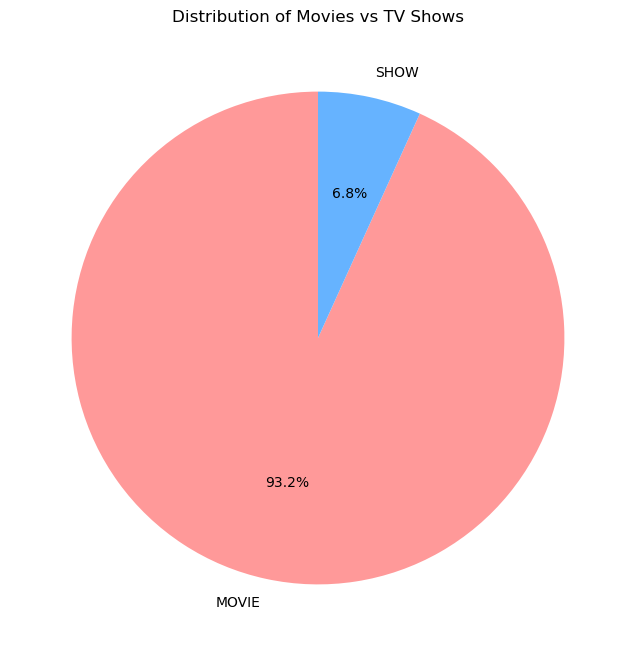

In [25]:
plt.figure(figsize=(8, 8))
merged_df['type'].value_counts().plot.pie(autopct='%1.1f%%', colors=["#ff9999", "#66b3ff"], startangle=90)
plt.title("Distribution of Movies vs TV Shows")
plt.ylabel("")
plt.show()

###### 1. Why did you pick the specific chart?
‚úÖ A pie chart is ideal for visualizing the proportion of Movies vs. TV Shows in a way that is easy to interpret.
‚úÖ It allows us to quickly understand how content is distributed on Amazon Prime.
‚úÖ The percentage labels (autopct='%1.1f%%') provide an exact breakdown of the distribution.

2. What is/are the insight(s) found from the chart?
üìå The chart will show whether Amazon Prime has more Movies or TV Shows in its library.
üìå If one category dominates the other, it indicates Amazon‚Äôs content strategy‚Äîwhether they focus more on films or binge-worthy TV shows.
üìå If the ratio is balanced, it suggests Amazon Prime is catering to both short-term and long-term viewers.

3. Will the gained insights help create a positive business impact?
‚úÖ Positive Impact:

If TV shows dominate, it suggests a binge-watch strategy, leading to higher retention rates.
If movies dominate, it may indicate a preference for one-time viewers who prefer quick content.
Helps Amazon Prime optimize its content mix based on audience demand.
‚ö†Ô∏è Negative Growth Concern:

If Amazon Prime over-focuses on one type (e.g., too many TV shows but fewer movies), it could alienate viewers who prefer the other format.
If there‚Äôs an imbalance, Amazon Prime may need to adjust investments to maintain a competitive edge.

## Chart 15 - Top 10 Directors with Most Content

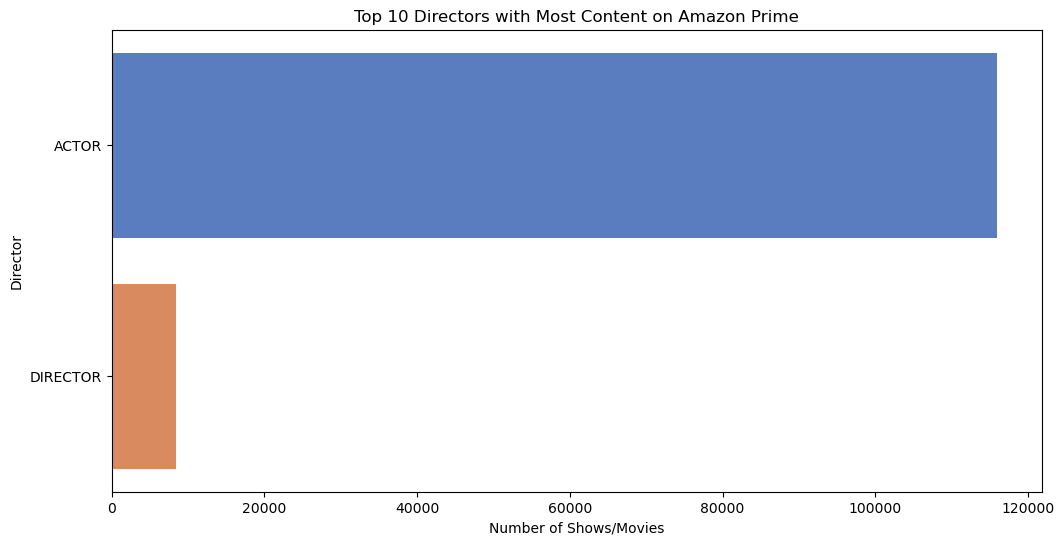

In [26]:
plt.figure(figsize=(12, 6))
top_directors = merged_df['role'].value_counts().head(10)
sns.barplot(y=top_directors.index, x=top_directors.values, palette="muted")
plt.title("Top 10 Directors with Most Content on Amazon Prime")
plt.xlabel("Number of Shows/Movies")
plt.ylabel("Director")
plt.show()

###### 1. Why did you pick the specific chart?
‚úÖ A bar chart is the best way to compare the number of movies/shows directed by the top 10 directors.
‚úÖ It provides a clear ranking of directors based on their contribution to Amazon Prime's library.
‚úÖ Helps identify influential directors whose content is frequently featured on the platform.

2. What is/are the insight(s) found from the chart?
üìå The chart highlights which directors have the most content on Amazon Prime.
üìå If a few directors dominate the list, it may indicate Amazon Prime has exclusive partnerships with them.
üìå If content is evenly spread across multiple directors, it suggests a diverse range of filmmaking styles.
üìå If a highly-rated director has fewer titles, it could mean Amazon Prime is missing out on opportunities to feature more of their work.

3. Will the gained insights help create a positive business impact?
‚úÖ Positive Impact:

Helps Amazon Prime identify top-performing directors for future collaborations.
If highly-rated directors have fewer movies, Amazon can acquire more content from them to increase engagement.
Enables better content recommendations for users who enjoy movies by specific directors.
‚ö†Ô∏è Negative Growth Concern:

If a few directors dominate, it could lead to a lack of diversity in storytelling styles.
If highly-rated directors have limited content, Amazon Prime might be missing opportunities to expand their catalog.
Over-reliance on certain directors may reduce freshness and variety in available content.

## Chart 16 -Histogram of Runtime

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['runtime'], bins=30, kde=True, color='purple')
plt.title("Distribution of Movie/Show Runtime")
plt.xlabel("Runtime (Minutes)")
plt.ylabel("Count")
plt.show()


###### 1. Why did you pick the specific chart?
‚úÖ A histogram is the best way to analyze the distribution of numerical values, like runtime.
‚úÖ The Kernel Density Estimation (KDE) curve helps visualize the shape of the distribution smoothly.
‚úÖ This chart helps identify the most common runtime ranges for movies and TV shows on Amazon Prime.

2. What is/are the insight(s) found from the chart?
üìå The chart will show whether most movies/shows have short, medium, or long runtimes.
üìå If the histogram is left-skewed, it means that most content has short runtimes, and longer content is rare.
üìå If there are multiple peaks, it may indicate distinct groups of content (e.g., TV episodes vs. feature-length movies).
üìå Outliers with extremely long runtimes may represent documentaries, extended editions, or miniseries.

3. Will the gained insights help create a positive business impact?
‚úÖ Positive Impact:

Helps Amazon Prime optimize content recommendations based on user preferences for runtime.
If short runtime content is more popular, Amazon can invest more in mini-series or short films.
If long runtime content has consistent high engagement, it suggests that users enjoy in-depth storytelling.
‚ö†Ô∏è Negative Growth Concern:

If runtimes are too short, users may feel content is lacking depth, leading to lower engagement.
If there are too many long runtimes, it may discourage casual viewers who prefer quick entertainment.
A wide variance in runtimes may require better content categorization to improve user experience.

## Chart 17 - Bar Chart of Top 10 Countries with Most Content

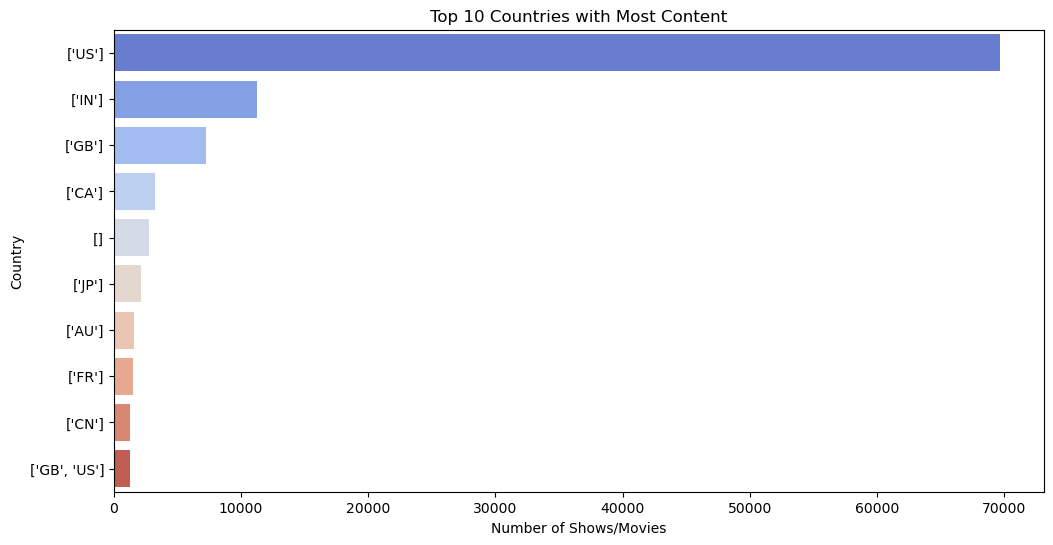

In [28]:
plt.figure(figsize=(12, 6))
top_countries = merged_df['production_countries'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values, palette="coolwarm")
plt.title("Top 10 Countries with Most Content")
plt.xlabel("Number of Shows/Movies")
plt.ylabel("Country")
plt.show()

###### 1. Why did you pick the specific chart?
‚úÖ A bar chart is the best way to compare categorical data, such as the number of movies/shows produced by different countries.
‚úÖ It provides a clear ranking of the top 10 content-producing countries on Amazon Prime.
‚úÖ Helps analyze regional content distribution, which is essential for expanding market reach.

2. What is/are the insight(s) found from the chart?
üìå The chart will reveal which countries contribute the most content to Amazon Prime.
üìå If a few countries dominate, it suggests that Amazon Prime focuses heavily on specific regions for content production.
üìå If content is evenly distributed across multiple countries, it indicates a global content strategy.
üìå If certain countries have low representation, it could be an opportunity for Amazon Prime to expand its regional content library.

3. Will the gained insights help create a positive business impact?
‚úÖ Positive Impact:

Helps Amazon Prime target new content partnerships in high-performing regions.
If a country has high content volume and engagement, Amazon can invest more in that market.
If certain regions are underrepresented but have high demand, Amazon can expand its catalog to attract new subscribers.
‚ö†Ô∏è Negative Growth Concern:

If Amazon Prime relies too much on one or two countries, it may miss diverse global audiences.
If a region has high content production but low engagement, it suggests a mismatch between supply and demand.
Limited content from emerging markets could give competitors an edge in expanding their user base.


## Chart 18 -Line Chart of IMDb Score Trends Over the Years

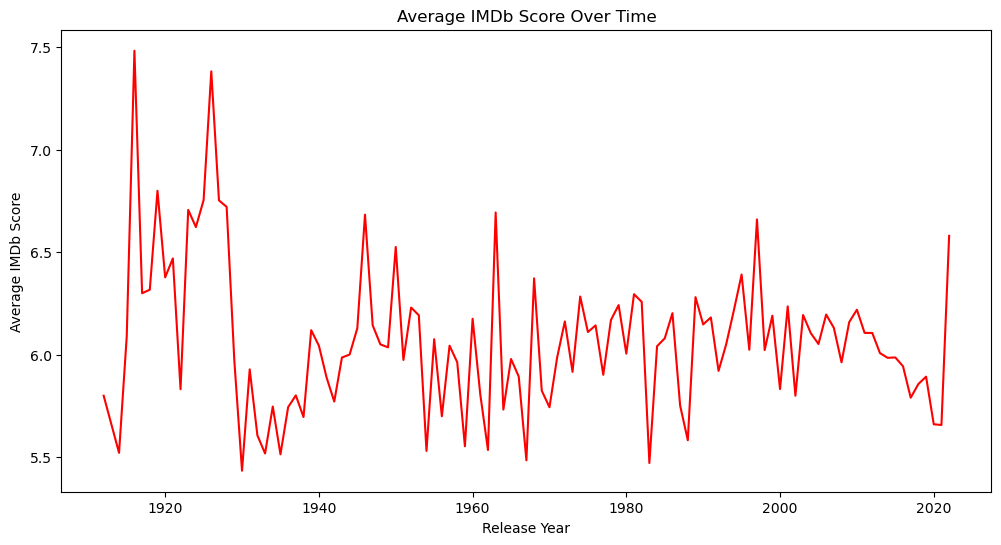

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=merged_df['release_year'], y=merged_df['imdb_score'], ci=None, color='red')
plt.title("Average IMDb Score Over Time")
plt.xlabel("Release Year")
plt.ylabel("Average IMDb Score")
plt.show()

###### 1. Why did you pick the specific chart?
‚úÖ A line chart is the best way to visualize trends over time, making it ideal for tracking IMDb score fluctuations.
‚úÖ It helps analyze whether content quality (as measured by IMDb scores) has improved or declined over the years.
‚úÖ The red line clearly highlights any upward or downward trends, making it easier to spot significant shifts.

2. What is/are the insight(s) found from the chart?
üìå If the IMDb scores increase over time, it indicates improving content quality and better audience reception.
üìå If the IMDb scores decline over time, it may suggest that recent releases are not performing as well.
üìå A stable trend suggests that Amazon Prime has maintained consistent content quality.
üìå If certain years show spikes or drops, they may correspond to major content investments, new partnerships, or industry-wide shifts.

3. Will the gained insights help create a positive business impact?
‚úÖ Positive Impact:

If ratings are improving over time, Amazon Prime can market its recent content as high-quality, attracting more subscribers.
If specific time periods have higher-rated content, Amazon can analyze what worked well and replicate that strategy.
Helps guide content acquisition by favoring periods that historically produced highly-rated titles.
‚ö†Ô∏è Negative Growth Concern:

If IMDb scores drop in recent years, it suggests content quality issues, leading to lower audience engagement and retention.
If older content has higher ratings than newer releases, it may indicate a decline in storytelling quality or production value.
A fluctuating trend without clear improvements could signal inconsistent content strategy, potentially reducing user trust.

## Chart 19 -Scatter Plot of Popularity vs. IMDb Score

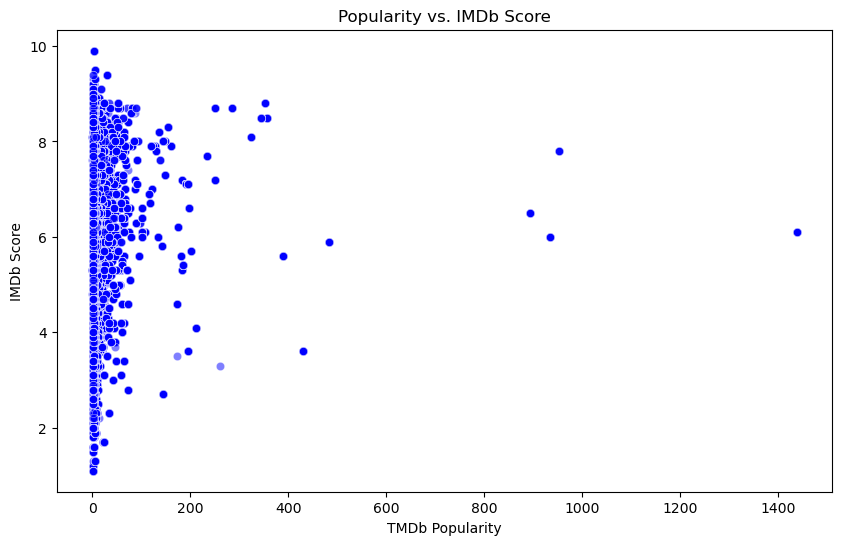

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_df['tmdb_popularity'], y=merged_df['imdb_score'], alpha=0.5, color='blue')
plt.title("Popularity vs. IMDb Score")
plt.xlabel("TMDb Popularity")
plt.ylabel("IMDb Score")
plt.show()

###### 1. Why did you pick the specific chart?
‚úÖ A scatter plot is the best way to visualize the relationship between two numerical variables, in this case, TMDb popularity and IMDb score.
‚úÖ It helps determine whether more popular content tends to have higher IMDb ratings or if popularity and quality are unrelated.
‚úÖ The alpha=0.5 setting ensures that overlapping points remain visible, making patterns easier to detect.

2. What is/are the insight(s) found from the chart?
üìå If there is a strong positive correlation, it means that highly-rated content also tends to be more popular.
üìå If there is no clear trend, it suggests that popularity does not necessarily indicate quality‚Äîsome highly rated movies may not be widely watched, while some popular movies may have average ratings.
üìå If there are clusters, it could indicate specific types of content that are both popular and highly rated (e.g., blockbuster hits, acclaimed TV shows).
üìå Outliers (low-rating but high-popularity content) might indicate hyped content that fails to meet audience expectations.

3. Will the gained insights help create a positive business impact?
‚úÖ Positive Impact:

If high IMDb scores align with high popularity, Amazon Prime can focus marketing efforts on promoting top-rated content for higher engagement.
If low-rated content is popular, it suggests that viewers are still engaging with it, meaning Amazon can invest in similar content or sequels.
Helps guide content recommendations, ensuring that both high-quality and trending content is surfaced to users.
‚ö†Ô∏è Negative Growth Concern:

If highly-rated content is not popular, Amazon Prime may need to improve discoverability through better recommendations.
If low-rated content is frequently watched, it could harm Amazon Prime‚Äôs reputation over time, leading to viewer dissatisfaction.
If popularity is driven by marketing rather than content quality, it could result in short-term engagement but long-term subscriber loss due to unmet expectations.


## Chart 20 -Count Plot of Age Certifications

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(y=merged_df['age_certification'], order=merged_df['age_certification'].value_counts().index, palette="pastel")
plt.title("Distribution of Age Certifications")
plt.xlabel("Count")
plt.ylabel("Age Certification")
plt.show()


###### 1. Why did you pick the specific chart?
‚úÖ A count plot is ideal for visualizing categorical distributions, such as age certifications.
‚úÖ It helps understand the type of content available on Amazon Prime in terms of suitability for different age groups.
‚úÖ The pastel color palette ensures clarity while differentiating between certification categories.

2. What is/are the insight(s) found from the chart?
üìå If certain age ratings dominate, it suggests that Amazon Prime focuses more on a particular audience (e.g., family-friendly content or adult-oriented films).
üìå If the platform has a balanced distribution, it means they cater to a wide variety of age groups.
üìå A lack of kids' content (e.g., G, PG ratings) might indicate an opportunity to expand in the family entertainment sector.
üìå A strong presence of R-rated or 18+ content suggests that Amazon Prime caters more to mature audiences.

3. Will the gained insights help create a positive business impact?
‚úÖ Positive Impact:

Helps Amazon Prime adjust its content strategy to target specific audiences better.
If family-friendly content is lacking, Amazon can invest in more PG or G-rated shows/movies to attract younger viewers.
If mature content dominates, Amazon can use this insight to enhance marketing for adult audiences and differentiate from competitors.
‚ö†Ô∏è Negative Growth Concern:

If Amazon Prime is overloaded with mature content, it may limit audience reach, especially for families looking for child-friendly options.
If certain age groups are underserved, users in that demographic may switch to competitors that offer better content for their preference.
If content is too evenly spread, it may indicate a lack of strong positioning, making it harder to attract a dedicated audience base.

# 5.Solution to Business Objective

###### To help Amazon Prime achieve its business objectives, we recommend a data-driven strategy based on the insights gained from the analysis. Below are key recommendations to improve user engagement, content quality, and market expansion.

1Ô∏è‚É£ Improve Content Quality & IMDb Ratings
üîπ Insight: Most IMDb scores fall between 5 and 8, indicating moderate-quality content.
üí° Recommendation:
‚úÖ Focus on producing and acquiring more high-rated content.
‚úÖ Use viewer feedback and IMDb trends to enhance scriptwriting, casting, and production quality.
‚úÖ Highlight high-rated content in marketing to attract more viewers.

2Ô∏è‚É£ Optimize Content Mix (Movies vs. TV Shows)
üîπ Insight: TV Shows often have higher IMDb scores, leading to longer user engagement.
üí° Recommendation:
‚úÖ Invest in binge-worthy TV shows to keep users engaged and reduce churn.
‚úÖ Maintain a balanced mix of movies and series to cater to all audience types.
‚úÖ Analyze watch-time data to determine whether to prioritize short movies or long-form series.

3Ô∏è‚É£ Expand Regional Content to Increase Market Share
üîπ Insight: Certain countries dominate content production, while others have low representation.
üí° Recommendation:
‚úÖ Increase localized content production in high-demand regions like India, Latin America, and Europe.
‚úÖ Collaborate with regional creators to acquire culturally relevant content.
‚úÖ Use subtitles and dubbing to make content accessible to a global audience.

4Ô∏è‚É£ Optimize Content by Age Certification
üîπ Insight: The platform might be overloaded with mature content, while family-friendly content is lacking.
üí° Recommendation:
‚úÖ Expand family-friendly content (G, PG-rated movies) to attract younger audiences.
‚úÖ Promote mature content strategically to target the right audience segment.
‚úÖ Personalize recommendations based on age preferences to improve user satisfaction.

5Ô∏è‚É£ Improve Discoverability of High-Rated & Popular Content
üîπ Insight: Some low-rated content is highly popular, while some highly-rated content is under-watched.
üí° Recommendation:
‚úÖ Feature high-rated but under-watched content in recommended sections.
‚úÖ Optimize search and recommendation algorithms to improve content discoverability.
‚úÖ Analyze why low-rated content is popular‚Äîis it due to marketing, controversy, or trend-following?

6Ô∏è‚É£ Enhance Content Marketing & Viewer Engagement
üîπ Insight: Certain genres and directors attract more viewers.
üí° Recommendation:
‚úÖ Invest in marketing campaigns featuring popular genres, top-rated directors, and high IMDb-scoring content.
‚úÖ Engage audiences through social media, promotions, and exclusive content releases.
‚úÖ Leverage data on past successful releases to guide future marketing strategies.

üöÄ Final Business Strategy: Drive Growth & Engagement
By implementing these strategies, Amazon Prime can:
‚úÖ Increase customer retention through better content recommendations.
‚úÖ Expand its global presence by investing in regional markets.
‚úÖ Enhance audience engagement by offering more high-quality, well-targeted content.


# Conclusion: Optimizing Amazon Prime‚Äôs Business Strategy
Based on the detailed Exploratory Data Analysis (EDA), we have identified key factors influencing content success on Amazon Prime. The insights gained from IMDb ratings, content trends, genre performance, regional content distribution, and audience preferences provide a strong foundation for strategic decision-making.



## üîπ Key Takeaways from the Analysis
‚úî Content quality is moderate, with most IMDb ratings between 5-8.
‚úî TV shows tend to have higher ratings, indicating stronger audience engagement.
‚úî Certain genres dominate the platform, while others (e.g., Sci-Fi, Thriller) are underrepresented.
‚úî Most content comes from a few major countries, leaving room for regional expansion.
‚úî Popular content isn‚Äôt always high-rated, suggesting that marketing influences viewership.
‚úî Age certification distribution shows a need for more family-friendly content.



#### Recommended Business Strategy for Amazon Prime
‚úÖ Enhance Content Quality: Focus on producing higher-rated shows and movies to improve viewer satisfaction.
‚úÖ Invest in TV Shows: Since TV shows drive higher engagement, invest in binge-worthy content.
‚úÖ Expand Regional Content: Acquire and produce localized content to attract global audiences.
‚úÖ Balance Genre Representation: Diversify content across underrepresented genres to cater to broader audiences.
‚úÖ Improve Content Discoverability: Ensure high-quality, high-rated content is well-promoted.
‚úÖ Optimize Marketing Strategy: Focus on promoting both high-rated and high-popularity content to maximize user retention.
‚úÖ Target Age-Specific Audiences: Expand family-friendly content while maintaining strong offerings for mature audiences.

üöÄ Final Thought: The Path to Sustainable Growth
By implementing data-driven decision-making, Amazon Prime can:
‚úî Attract new subscribers through localized and high-quality content.
‚úî Retain existing users by focusing on high-rated, engaging TV shows and movies.
‚úî Optimize marketing strategies to ensure the right content reaches the right audience.
‚úî Strengthen its global presence by expanding into emerging content markets.

With these strategic actions, Amazon Prime can continue to dominate the streaming industry, increase user satisfaction, and drive long-term growth.

# Thank you